Que1 Do outline analysis on total bill column of tips dataset


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
tipsdf = pd.read_csv('DataSets/tips.csv')
tipsdf.head

<bound method NDFrame.head of      total_bill   tip  gender smoker   day    time  size  price_per_person  \
0         16.99  1.01  Female     No   Sun  Dinner     2              8.49   
1         10.34  1.66    Male     No   Sun  Dinner     3              3.45   
2         21.01  3.50    Male     No   Sun  Dinner     3              7.00   
3         23.68  3.31    Male     No   Sun  Dinner     2             11.84   
4         24.59  3.61  Female     No   Sun  Dinner     4              6.15   
..          ...   ...     ...    ...   ...     ...   ...               ...   
239       29.03  5.92    Male     No   Sat  Dinner     3              9.68   
240       27.18  2.00  Female    Yes   Sat  Dinner     2             13.59   
241       22.67  2.00    Male    Yes   Sat  Dinner     2             11.34   
242       17.82  1.75    Male     No   Sat  Dinner     2              8.91   
243       18.78  3.00  Female     No  Thur  Dinner     2              9.39   

             Payer Name     CC Nu

In [15]:
Q1 = np.percentile(tipsdf['total_bill'], 25)
Q3 = np.percentile(tipsdf['total_bill'], 75)

IQR = Q3 - Q1

lower_bond = Q1 - (IQR * 1.5)
upper_bond = Q3 + (IQR * 1.5)

# Use a boolean Series as the mask (don't wrap it in a list)
outliers = (tipsdf['total_bill'] < lower_bond) | (tipsdf['total_bill'] > upper_bond)
print("Outliers in total_bill column:")
print(tipsdf[outliers])

Outliers in total_bill column:
     total_bill    tip  gender smoker   day    time  size  price_per_person  \
59        48.27   6.73    Male     No   Sat  Dinner     4             12.07   
102       44.30   2.50  Female    Yes   Sat  Dinner     3             14.77   
142       41.19   5.00    Male     No  Thur   Lunch     5              8.24   
156       48.17   5.00    Male     No   Sun  Dinner     6              8.03   
170       50.81  10.00    Male    Yes   Sat  Dinner     3             16.94   
182       45.35   3.50    Male    Yes   Sun  Dinner     3             15.12   
184       40.55   3.00    Male    Yes   Sun  Dinner     2             20.27   
197       43.11   5.00  Female    Yes  Thur   Lunch     4             10.78   
212       48.33   9.00    Male     No   Sat  Dinner     4             12.08   

          Payer Name     CC Number Payment ID  
59       Brian Ortiz  6.596450e+15    Sat8139  
102    Heather Cohen  3.797710e+14    Sat6240  
142     Eric Andrews  4.356530e+15

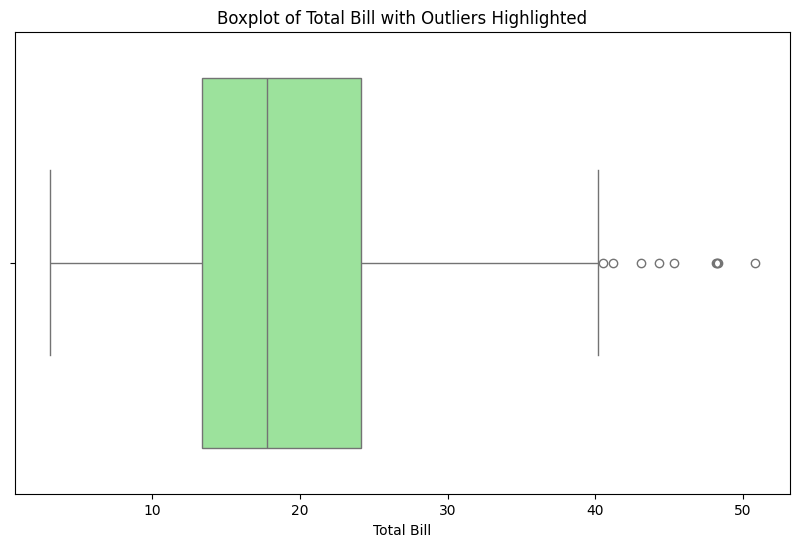

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=tipsdf['total_bill'], color='lightgreen')
plt.title('Boxplot of Total Bill with Outliers Highlighted')
plt.xlabel('Total Bill')
plt.show()

3) Do skewness analysis and plotting for 'on-board Service' column of 'airline passenger service' dataset. Also find CoV for first time versus returning customers for the 'Ease of online booking' column.


In [20]:
df1 = pd.read_csv('DataSets/airline.csv')
df1.head()              

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [22]:
On_board_Service = df1["On-board Service"]

mean = On_board_Service.mean()
median = On_board_Service.median()
mode = On_board_Service.mode()[0]
skew = On_board_Service.skew()
kurtosis = On_board_Service.kurt()

print(f"Mean: {mean}, Median: {median}, Mode: {mode}")
print(f"Skewness: {skew}, Kurtosis: {kurtosis}")


Mean: 3.3830227902679395, Median: 4.0, Mode: 4
Skewness: -0.4213196481539713, Kurtosis: -0.8888419232915838


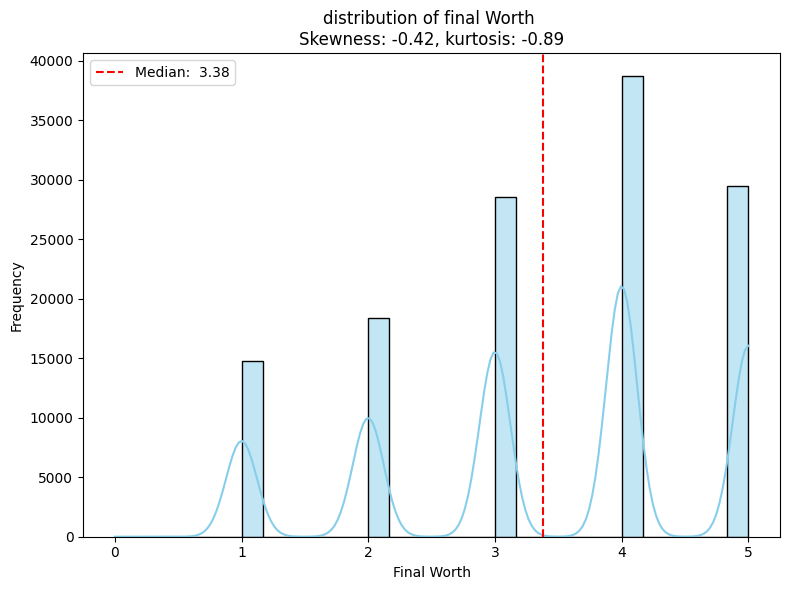

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(On_board_Service, kde = True, color = 'skyblue', bins =30)
plt.axvline(mean, color= 'red', linestyle = '--', label = f'Median:  {mean:.2f}')
plt.title(f'distribution of final Worth \nSkewness: {skew:.2f}, kurtosis: {kurtosis:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

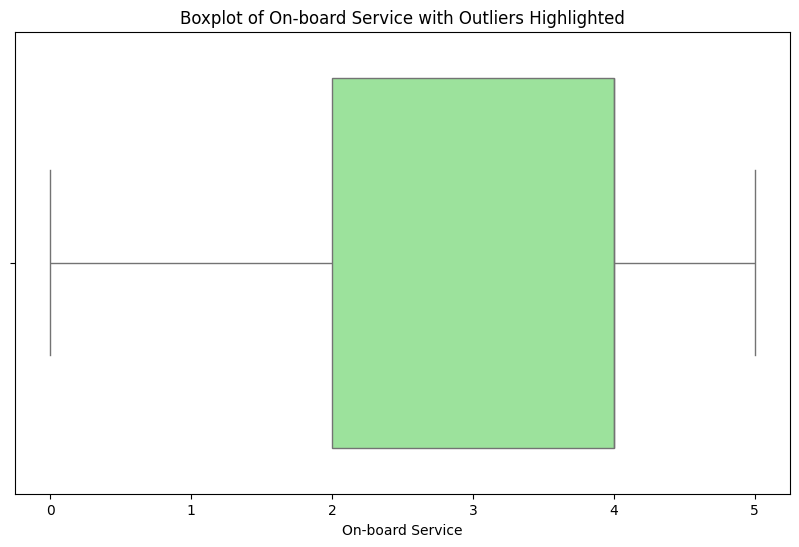

In [24]:
plt.figure(figsize=(10, 6))
# use the existing Series variable (column name in df1 is 'On-board Service')
sns.boxplot(x=On_board_Service, color='lightgreen')
plt.title('Boxplot of On-board Service with Outliers Highlighted')
plt.xlabel('On-board Service')
plt.show()

In [29]:
#Calculatiomn of Cov of first time and returning customers
first_time = df1[df1['Customer Type'] == 'First-time']['On-board Service']
returning = df1[df1['Customer Type'] == 'Returning']['On-board Service']

Cov_first_time = first_time.std()/first_time.mean() * 100
Cov_returning = returning.std()/ returning.mean() * 100

print(f"Coefficient of Variation for First time customers: {Cov_first_time:.2f}%")
print(f"Coefficient of Variation for Returning customers: {Cov_returning:.2f}%")

Coefficient of Variation for First time customers: 39.45%
Coefficient of Variation for Returning customers: 37.68%


In [26]:
df1.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


4) Pandas practice

Use titanic.csv dataset.

1. Do Exploratory Data Analytics (EDA) on the dataset. (Hint: head(), columns, etc)

2. Find passengers whose age is between 20 and 2

3. Find passengers where gender is female and passenger class is 1.

4. Find average age of female and male passengers.

5. Count number of passengers in each passenger class.

6. Separate passengers who survived (survived column contains 0) and who did not survive (survived column contains 1) into two separate dataframes.

7. For the above two dataframes, find number of females and males.

8. Sort the original dataframe on age in descending order and display the top 3 records.

In [31]:
df = pd.read_csv('DataSets/titanic.csv')

In [32]:
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [33]:
df.columns

Index(['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [35]:
df.isnull().sum()

survived      0
pclass        0
gender        0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [36]:
# Find passengers whose age is between 20 and 2
filtered_df = df[(df['age']>2) & (df['age']<20)]
filtered_df

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
9,1,2,female,14.0,1,0,30.0708,C,NaN
10,1,3,female,4.0,1,1,16.7000,S,G
14,0,3,female,14.0,0,0,7.8542,S,NaN
22,1,3,female,15.0,0,0,8.0292,Q,NaN
24,0,3,female,8.0,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...
855,1,3,female,18.0,0,1,9.3500,S,NaN
869,1,3,male,4.0,1,1,11.1333,S,NaN
875,1,3,female,15.0,0,0,7.2250,C,NaN
877,0,3,male,19.0,0,0,7.8958,S,NaN


In [37]:
female_with_pclass_1 = df[(df['gender'] == 'female') & (df['pclass'] == 1) ]
female_with_pclass_1

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
11,1,1,female,58.0,0,0,26.5500,S,C
31,1,1,female,NaN,1,0,146.5208,C,B
52,1,1,female,49.0,1,0,76.7292,C,D
...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,NaN
862,1,1,female,48.0,0,0,25.9292,S,D
871,1,1,female,47.0,1,1,52.5542,S,D
879,1,1,female,56.0,0,1,83.1583,C,C


In [40]:
female_avg_age = df[df['gender'] == 'female']['age'].mean()
male_avg_age = df[df['gender'] == 'male']['age'].mean()
print(f"Average age of female passengers: {female_avg_age:.2f}")
print(f"Average age of male passengers: {male_avg_age:.2f}")  

Average age of female passengers: 27.92
Average age of male passengers: 30.73


In [41]:
passangee_in_each_class = df['pclass'].value_counts()
print(passangee_in_each_class)

pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [43]:
#Separate passengers who survived (survived column contains 0) and who did not survive (survived column contains 1) into two separate dataframes.
survived_df = df[df['survived'] == 1]
not_survived_df = df[df['survived'] == 0]
survived_df.head()
not_survived_df.head()


,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN


In [47]:
no_of_male_survived = survived_df['gender'].value_counts().get('male',1)
print(no_of_male_survived)

109


In [52]:
no_of_female_survived = survived_df['gender'].value_counts().get('female',1)
print(no_of_female_survived)

233


In [59]:
sorted_df = df.sort_values('age', ascending=False)
sorted_df['age'].head(3)

630    80.0
851    74.0
493    71.0
Name: age, dtype: float64

In [4]:
socialdf = pd.read_csv('DataSets/social_media_usage.csv')
socialdf.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


In [6]:
fb = socialdf[socialdf['App'] == 'Facebook']
insta = socialdf[socialdf['App'] == 'Instagram']

In [8]:
fb_cov = fb[['Daily_Minutes_Spent','Posts_Per_Day']].cov()
insta_cov = insta[['Daily_Minutes_Spent','Posts_Per_Day']].cov()

print("Facebook Covariance:\n", fb_cov)
print("Instagram Covariance:\n", insta_cov)


fb_corr = fb[['Daily_Minutes_Spent','Posts_Per_Day']].corr()
insta_corr = insta[['Daily_Minutes_Spent','Posts_Per_Day']].corr()

print("Facebook Correlation:\n", fb_corr)
print("Instagram Correlation:\n", insta_corr)

Facebook Covariance:
                      Daily_Minutes_Spent  Posts_Per_Day
Daily_Minutes_Spent         23610.052669     -56.051906
Posts_Per_Day                 -56.051906      40.829139
Instagram Covariance:
                      Daily_Minutes_Spent  Posts_Per_Day
Daily_Minutes_Spent         22820.392806     -67.486331
Posts_Per_Day                 -67.486331      34.812127
Facebook Correlation:
                      Daily_Minutes_Spent  Posts_Per_Day
Daily_Minutes_Spent              1.00000       -0.05709
Posts_Per_Day                   -0.05709        1.00000
Instagram Correlation:
                      Daily_Minutes_Spent  Posts_Per_Day
Daily_Minutes_Spent             1.000000      -0.075716
Posts_Per_Day                  -0.075716       1.000000


In [12]:
import pandas as pd

# 1. Read each CSV file into a separate DataFrame
df_2015 = pd.read_csv('DataSets/marathon_results_2015.csv')
df_2016 = pd.read_csv('DataSets/marathon_results_2016.csv')
df_2017 = pd.read_csv('DataSets/marathon_results_2017.csv')

# 2. Concatenate the DataFrames by passing them in a list
df = pd.concat([df_2015, df_2016, df_2017], ignore_index=True)

# 3. Display the head of the combined DataFrame
print(df.head())
df.columns

   Unnamed: 0 Bib                   Name  Age M/F         City State Country  \
0         0.0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH   
1         1.0   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH   
2         2.0   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN   
3         3.0  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN   
4         4.0  10          Korir, Wesley   32   M       Kitale   NaN     KEN   

  Citizen Unnamed: 9  ...      30K      35K      40K     Pace Proj Time  \
0     NaN        NaN  ...  1:32:00  1:47:59  2:02:39  0:04:56         -   
1     NaN        NaN  ...  1:31:59  1:47:59  2:02:42  0:04:58         -   
2     NaN        NaN  ...  1:32:00  1:47:59  2:03:01  0:04:59         -   
3     NaN        NaN  ...  1:32:00  1:48:03  2:03:47  0:05:00         -   
4     NaN        NaN  ...  1:32:00  1:47:59  2:03:27  0:05:00         -   

  Official Time Overall Gender Division Unnamed: 8  
0       2:09:17

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division', 'Unnamed: 8'],
      dtype='object')

In [16]:
# convert time-like strings to numeric (seconds), coerce invalid entries (like '-') to NaT,
# drop those rows, then compute correlation
times = df[['Official Time', 'Pace']].copy()
for col in times.columns:
	times[col] = pd.to_timedelta(times[col], errors='coerce').dt.total_seconds()

times = times.dropna()
corelation = times.corr()
print(corelation)

               Official Time      Pace
Official Time       1.000000  0.999667
Pace                0.999667  1.000000


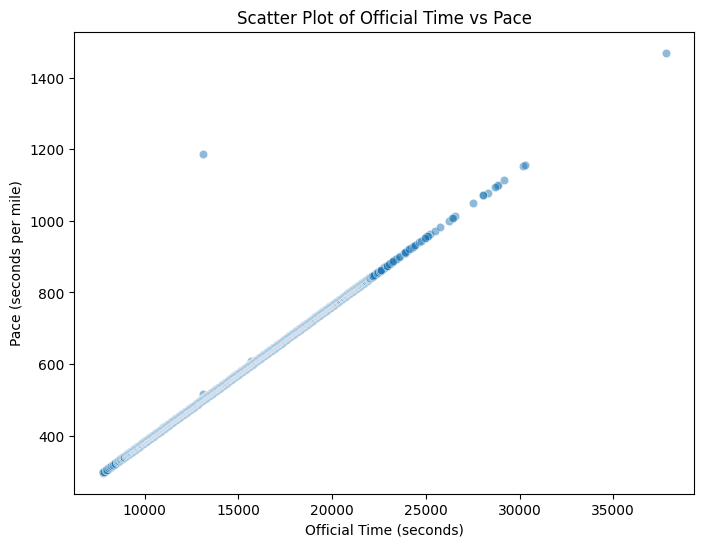

In [17]:
#draw scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=times['Official Time'], y=times['Pace'], alpha=0.5)
plt.title('Scatter Plot of Official Time vs Pace')
plt.xlabel('Official Time (seconds)')
plt.ylabel('Pace (seconds per mile)')
plt.show()

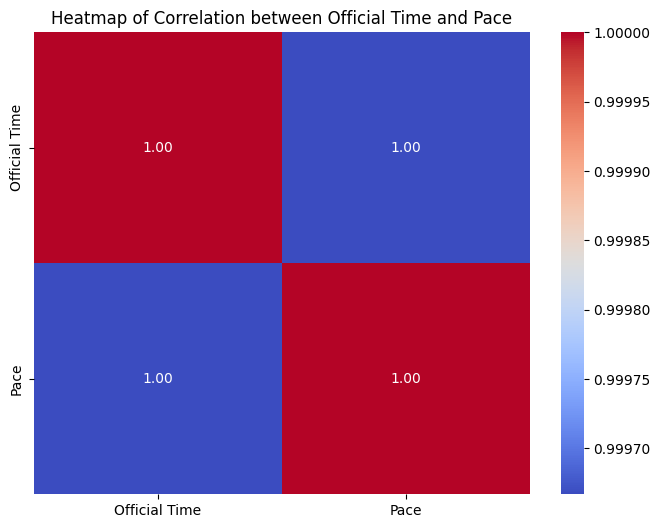

In [18]:
#draw heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corelation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Official Time and Pace')
plt.show()